# Log-linear Models for Three-way Tables

Log-linear modeling is a type of analysis to understand the association between categorical variables. This approach uses regression to achieve its objective. However, the use of log-linear modeling is often multi-step, requires the production and comparison of many models and necessitates reflection on the tradeoff between goodness-of-fit `GoF` and model parsimony, degrees-of-freedom `DoF`. Log-linear modeling differs from logistic or multinomial regression in that the latter will typically pick one of the categorical variables to be the dependent variable (conditional distribution of the dependent variable given the independent variables); in log-linear models, the dependent variable comes from the counts of the contingency table induced by the variables (joint distribution). As such, a very good way to understand log-linear modeling is to understand contingency tables. 

In a three-way contingency table, we have 3 categorical variables, denoted as `A`, `B` and `C` and whose levels (values) are indexed as `i`, `j` and `k`, correspondingly. The log of expected count $\mu_{ijk}$ is in a linear relationship to A, B and C in a finite number of ways, one of which is `optimal` and what we are trying to find using log-linear modeling. Here are some ways that $\mu_{ijk}$ may be related to A, B and C. (Remember that $\mu_{ijk}$ is the product of the corresponding marginals divided by the total).

- independence: A, B and C are all independent, denoted as `(A, B, C)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C$
- joint independence: AB are jointly independent of C `(AB, C)`; AC are jointly independent of B `(AC, B)`; BC are jointly independent of A `(BC, A)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{AB}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{AC}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{BC}$
- conditional independence: A and B are independent given C `(AC, BC)`; A and C are independent given B `(AB, BC)`; B and C are independent give A `(AB, AC)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ik}^{AC} + \lambda_{jk}^{BC}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{jk}^{BC}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC}$
- homogeneous association: there is no three way interaction `(AB, AC, BC)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC} + \lambda_{jk}^{BC}$
- saturated: there are main, pairwise and three-way effects `(ABC)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC} + \lambda_{jk}^{BC} + \lambda_{ijk}^{ABC}$
  
Each of these models will have a `DoF` and `GoF` associated with them. The `GoF` can be the log-likelihood of the model (higher is better) or the deviance $G^2$ (lower is better). If we wanted to know the association between A, B and C, we can start from the independence model and move forward towards the saturated model (adding terms), or, we can start from the saturated model and move backward towards the independence model (remove terms). What is removed or added depends on how the `GoF` and `DoF` changes; we must strike a balance between `GoF` and model parsimony. We typically compare models using a likelihood ratio test based on $G^2$.

Lastly, the log-linear models above have graphical representation. Each log-linear model above asserts associations between the three variables.

## Load data

This data is about Berkely admissions. There are 3 categorical variables.

- `A`: admission
- `B`: sex
- `C`: department

In [1]:
import pandas as pd

df = pd.read_csv('./data/berkeley-admission.csv')
df.shape

(24, 4)

The three-way contingency table looks like the following.

In [2]:
pd.crosstab(df['department'], [df['sex'], df['admission']], values=df['n'], aggfunc=lambda x: x)

sex          Female              Male         
admission  Admitted Rejected Admitted Rejected
department                                    
A                89       19      512      313
B                17        8      353      207
C               202      391      120      205
D               131      244      139      279
E                94      299       53      138
F                24      317       22      351

We will use log-linear models to understand the relationship between these three variables.

## Complete independence model (A, B, C)

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C$

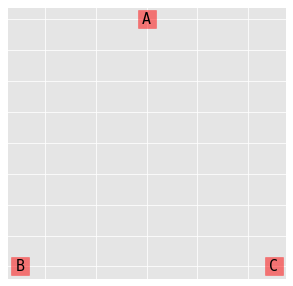

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def draw_graph(g):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    pos = {
        'A': (200, 250),
        'B': (150, 230),
        'C': (250, 230)
    }
    
    params = {
        'node_color': 'r',
        'node_size': 350,
        'node_shape': 's',
        'alpha': 0.5,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)
    
    params = {
        'font_size': 15,
        'font_color': 'k',
        'font_family': 'monospace',
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)
    
    params = {
        'width': 1.5,
        'alpha': 0.5,
        'edge_color': 'b',
        'arrowsize': 20,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)
    
    
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')

draw_graph(g)

In [4]:
from patsy import dmatrices
import statsmodels.api as sm

dept_levels = ['F', 'A', 'B', 'C', 'D', 'E']

y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels)', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1128.1
Date:                Tue, 08 Mar 2022   Deviance:                       2097.1
Time:                        19:07:02   Pearson chi2:                 2.00e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  4.7208      0.046    103.681      0.000       4.632       4.810
admission[T.Rejected]                      0.4562      0.031     14.956      0.000       0.396       0.516
sex[T.Male]                                0.3832      0.030     12.660      0.000       0.324       0.443
C(department, levels=dept_levels)[T.A]     0.2675      0.050      5.380      0.000       0.170       0.365
C(department, levels=dept_levels)[T.B]    -0.1993      0.056     -3.573      0.000      -0.309      -0.090
C(department, levels=dept_levels)[T.C]     0.2513      0.050      5.036      0.000       0.154       0.349
C(department, levels=dept_levels)[T.D]     0.1049      0.052      2.034      0.042       0.004       0.206
C(department, levels=dept_levels)[T.E]    -0.2010      0.056     -3.602      0.000      -0.310      -0.092
==========================================================================================================
"""

## Joint independence

### (A, BC)
$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{BC}$

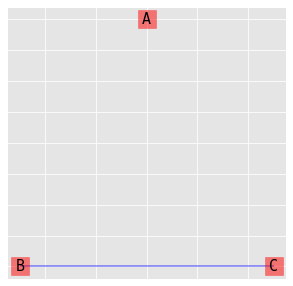

In [5]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('B', 'C')

draw_graph(g)

In [6]:
y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels) + sex * C(department, levels=dept_levels)', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -517.91
Date:                Tue, 08 Mar 2022   Deviance:                       876.74
Time:                        19:07:02   Pearson chi2:                     797.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              4.8849      0.057     85.279      0.000       4.773       4.997
admission[T.Rejected]                                  0.4562      0.031     14.956      0.000       0.396       0.516
sex[T.Male]                                            0.0897      0.075      1.197      0.231      -0.057       0.237
C(department, levels=dept_levels)[T.A]                -1.1498      0.110    -10.413      0.000      -1.366      -0.933
C(department, levels=dept_levels)[T.B]                -2.6130      0.207    -12.611      0.000      -3.019      -2.207
C(department, levels=dept_levels)[T.C]                 0.5533      0.068      8.141      0.000       0.420       0.687
C(department, levels=dept_levels)[T.D]                 0.0950      0.075      1.270      0.204      -0.052       0.242
C(department, levels=dept_levels)[T.E]                 0.1419      0.074      1.918      0.055      -0.003       0.287
sex[T.Male]:C(department, levels=dept_levels)[T.A]     1.9436      0.127     15.325      0.000       1.695       2.192
sex[T.Male]:C(department, levels=dept_levels)[T.B]     3.0194      0.218     13.869      0.000       2.593       3.446
sex[T.Male]:C(department, levels=dept_levels)[T.C]    -0.6911      0.102     -6.784      0.000      -0.891      -0.491
sex[T.Male]:C(department, levels=dept_levels)[T.D]     0.0189      0.103      0.183      0.855      -0.184       0.221
sex[T.Male]:C(department, levels=dept_levels)[T.E]    -0.8112      0.116     -7.010      0.000      -1.038      -0.584
======================================================================================================================
"""

### (B, AC)

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ik}^{AC}$

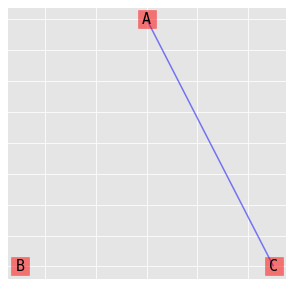

In [7]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'C')

draw_graph(g)

In [8]:
y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels) + admission * C(department, levels=dept_levels)', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -700.56
Date:                Tue, 08 Mar 2022   Deviance:                       1242.1
Time:                        19:07:02   Pearson chi2:                 1.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        2.9256      0.149     19.696      0.000       2.634       3.217
admission[T.Rejected]                                            2.6756      0.152     17.553      0.000       2.377       2.974
sex[T.Male]                                                      0.3832      0.030     12.660      0.000       0.324       0.443
C(department, levels=dept_levels)[T.A]                           2.5700      0.153     16.799      0.000       2.270       2.870
C(department, levels=dept_levels)[T.B]                           2.0849      0.156     13.336      0.000       1.778       2.391
C(department, levels=dept_levels)[T.C]                           1.9459      0.158     12.345      0.000       1.637       2.255
C(department, levels=dept_levels)[T.D]                           1.7698      0.160     11.095      0.000       1.457       2.082
C(department, levels=dept_levels)[T.E]                           1.1618      0.169      6.877      0.000       0.831       1.493
admission[T.Rejected]:C(department, levels=dept_levels)[T.A]    -3.2691      0.167    -19.567      0.000      -3.597      -2.942
admission[T.Rejected]:C(department, levels=dept_levels)[T.B]    -3.2185      0.175    -18.402      0.000      -3.561      -2.876
admission[T.Rejected]:C(department, levels=dept_levels)[T.C]    -2.0600      0.167    -12.306      0.000      -2.388      -1.732
admission[T.Rejected]:C(department, levels=dept_levels)[T.D]    -2.0145      0.170    -11.860      0.000      -2.347      -1.682
admission[T.Rejected]:C(department, levels=dept_levels)[T.E]    -1.5861      0.180     -8.822      0.000      -1.939      -1.234
================================================================================================================================
"""

### (C, AB)

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB}$

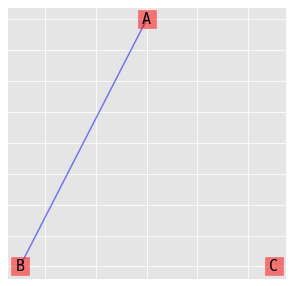

In [9]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'B')

draw_graph(g)

In [10]:
y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels) + admission * sex', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1081.2
Date:                Tue, 08 Mar 2022   Deviance:                       2003.4
Time:                        19:07:02   Pearson chi2:                 1.75e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  4.4756      0.055     82.056      0.000       4.369       4.583
admission[T.Rejected]                      0.8305      0.051     16.357      0.000       0.731       0.930
sex[T.Male]                                0.7667      0.051     14.952      0.000       0.666       0.867
C(department, levels=dept_levels)[T.A]     0.2675      0.050      5.380      0.000       0.170       0.365
C(department, levels=dept_levels)[T.B]    -0.1993      0.056     -3.573      0.000      -0.309      -0.090
C(department, levels=dept_levels)[T.C]     0.2513      0.050      5.036      0.000       0.154       0.349
C(department, levels=dept_levels)[T.D]     0.1049      0.052      2.034      0.042       0.004       0.206
C(department, levels=dept_levels)[T.E]    -0.2010      0.056     -3.602      0.000      -0.310      -0.092
admission[T.Rejected]:sex[T.Male]         -0.6112      0.064     -9.567      0.000      -0.736      -0.486
==========================================================================================================
"""

## Conditional independence

### (AC, BC)

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ik}^{AC} + \lambda_{jk}^{BC}$

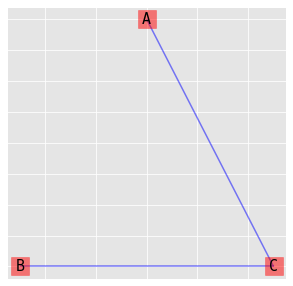

In [11]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'C')
g.add_edge('B', 'C')

draw_graph(g)

In [12]:
y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels) + admission * C(department, levels=dept_levels) + sex * C(department, levels=dept_levels)', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90.376
Date:                Tue, 08 Mar 2022   Deviance:                       21.686
Time:                        19:07:02   Pearson chi2:                     19.9
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        3.0896      0.153     20.253      0.000       2.791       3.389
admission[T.Rejected]                                            2.6756      0.152     17.553      0.000       2.377       2.974
sex[T.Male]                                                      0.0897      0.075      1.197      0.231      -0.057       0.237
C(department, levels=dept_levels)[T.A]                           1.1527      0.182      6.334      0.000       0.796       1.509
C(department, levels=dept_levels)[T.B]                          -0.3289      0.254     -1.297      0.195      -0.826       0.168
C(department, levels=dept_levels)[T.C]                           2.2479      0.164     13.687      0.000       1.926       2.570
C(department, levels=dept_levels)[T.D]                           1.7599      0.168     10.447      0.000       1.430       2.090
C(department, levels=dept_levels)[T.E]                           1.5047      0.176      8.559      0.000       1.160       1.849
admission[T.Rejected]:C(department, levels=dept_levels)[T.A]    -3.2691      0.167    -19.567      0.000      -3.597      -2.942
admission[T.Rejected]:C(department, levels=dept_levels)[T.B]    -3.2185      0.175    -18.402      0.000      -3.561      -2.876
admission[T.Rejected]:C(department, levels=dept_levels)[T.C]    -2.0600      0.167    -12.306      0.000      -2.388      -1.732
admission[T.Rejected]:C(department, levels=dept_levels)[T.D]    -2.0145      0.170    -11.860      0.000      -2.347      -1.682
admission[T.Rejected]:C(department, levels=dept_levels)[T.E]    -1.5861      0.180     -8.822      0.000      -1.939      -1.234
sex[T.Male]:C(department, levels=dept_levels)[T.A]               1.9436      0.127     15.325      0.000       1.695       2.192
sex[T.Male]:C(department, levels=dept_levels)[T.B]               3.0194      0.218     13.869      0.000       2.593       3.446
sex[T.Male]:C(department, levels=dept_levels)[T.C]              -0.6911      0.102     -6.784      0.000      -0.891      -0.491
sex[T.Male]:C(department, levels=dept_levels)[T.D]               0.0189      0.103      0.183      0.855      -0.184       0.221
sex[T.Male]:C(department, levels=dept_levels)[T.E]              -0.8112      0.116     -7.010      0.000      -1.038      -0.584
================================================================================================================================
"""

### (AB, BC)

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{jk}^{BC}$

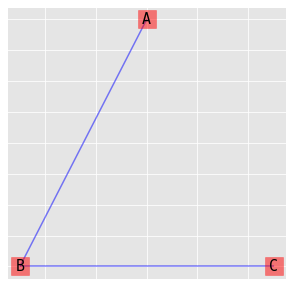

In [13]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'B')
g.add_edge('B', 'C')

draw_graph(g)

In [14]:
y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels) + admission * sex + sex * C(department, levels=dept_levels)', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -471.04
Date:                Tue, 08 Mar 2022   Deviance:                       783.02
Time:                        19:07:02   Pearson chi2:                     715.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              4.6396      0.065     71.737      0.000       4.513       4.766
admission[T.Rejected]                                  0.8305      0.051     16.357      0.000       0.731       0.930
sex[T.Male]                                            0.4731      0.086      5.528      0.000       0.305       0.641
C(department, levels=dept_levels)[T.A]                -1.1498      0.110    -10.413      0.000      -1.366      -0.933
C(department, levels=dept_levels)[T.B]                -2.6130      0.207    -12.611      0.000      -3.019      -2.207
C(department, levels=dept_levels)[T.C]                 0.5533      0.068      8.141      0.000       0.420       0.687
C(department, levels=dept_levels)[T.D]                 0.0950      0.075      1.270      0.204      -0.052       0.242
C(department, levels=dept_levels)[T.E]                 0.1419      0.074      1.918      0.055      -0.003       0.287
admission[T.Rejected]:sex[T.Male]                     -0.6112      0.064     -9.567      0.000      -0.736      -0.486
sex[T.Male]:C(department, levels=dept_levels)[T.A]     1.9436      0.127     15.325      0.000       1.695       2.192
sex[T.Male]:C(department, levels=dept_levels)[T.B]     3.0194      0.218     13.869      0.000       2.593       3.446
sex[T.Male]:C(department, levels=dept_levels)[T.C]    -0.6911      0.102     -6.784      0.000      -0.891      -0.491
sex[T.Male]:C(department, levels=dept_levels)[T.D]     0.0189      0.103      0.183      0.855      -0.184       0.221
sex[T.Male]:C(department, levels=dept_levels)[T.E]    -0.8112      0.116     -7.010      0.000      -1.038      -0.584
======================================================================================================================
"""

### (AB, AC)

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC}$

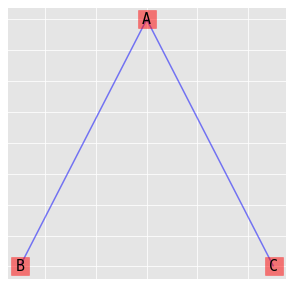

In [15]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'B')
g.add_edge('A', 'C')

draw_graph(g)

In [16]:
y, X = dmatrices('n ~ admission + sex + C(department, levels=dept_levels) + admission * sex + admission * C(department, levels=dept_levels)', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -653.70
Date:                Tue, 08 Mar 2022   Deviance:                       1148.3
Time:                        19:07:02   Pearson chi2:                 1.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        2.6804      0.152     17.688      0.000       2.383       2.977
admission[T.Rejected]                                            3.0500      0.158     19.335      0.000       2.741       3.359
sex[T.Male]                                                      0.7667      0.051     14.952      0.000       0.666       0.867
C(department, levels=dept_levels)[T.A]                           2.5700      0.153     16.799      0.000       2.270       2.870
C(department, levels=dept_levels)[T.B]                           2.0849      0.156     13.336      0.000       1.778       2.391
C(department, levels=dept_levels)[T.C]                           1.9459      0.158     12.345      0.000       1.637       2.255
C(department, levels=dept_levels)[T.D]                           1.7698      0.160     11.095      0.000       1.457       2.082
C(department, levels=dept_levels)[T.E]                           1.1618      0.169      6.877      0.000       0.831       1.493
admission[T.Rejected]:sex[T.Male]                               -0.6112      0.064     -9.567      0.000      -0.736      -0.486
admission[T.Rejected]:C(department, levels=dept_levels)[T.A]    -3.2691      0.167    -19.567      0.000      -3.597      -2.942
admission[T.Rejected]:C(department, levels=dept_levels)[T.B]    -3.2185      0.175    -18.402      0.000      -3.561      -2.876
admission[T.Rejected]:C(department, levels=dept_levels)[T.C]    -2.0600      0.167    -12.306      0.000      -2.388      -1.732
admission[T.Rejected]:C(department, levels=dept_levels)[T.D]    -2.0145      0.170    -11.860      0.000      -2.347      -1.682
admission[T.Rejected]:C(department, levels=dept_levels)[T.E]    -1.5861      0.180     -8.822      0.000      -1.939      -1.234
================================================================================================================================
"""

## Homogeneous model

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC} + \lambda_{jk}^{BC}$

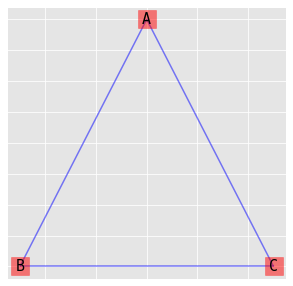

In [17]:
g = nx.Graph()
g.add_node('A')
g.add_node('B')
g.add_node('C')
g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('B', 'C')

draw_graph(g)

In [18]:
y, X = dmatrices('n ~ (admission + sex + C(department, levels=dept_levels))**2', df, return_type='dataframe')
sm.GLM(y, X, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      n   No. Observations:                   24
Model:                            GLM   Df Residuals:                        5
Model Family:                 Poisson   Df Model:                           18
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89.642
Date:                Tue, 08 Mar 2022   Deviance:                       20.217
Time:                        19:07:02   Pearson chi2:                     18.8
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        3.1364      0.157     20.011      0.000       2.829       3.444
admission[T.Rejected]                                            2.6256      0.158     16.646      0.000       2.316       2.935
sex[T.Male]                                                     -0.0018      0.106     -0.017      0.987      -0.210       0.207
C(department, levels=dept_levels)[T.A]                           1.1359      0.182      6.242      0.000       0.779       1.493
C(department, levels=dept_levels)[T.B]                          -0.3422      0.253     -1.351      0.177      -0.839       0.154
C(department, levels=dept_levels)[T.C]                           2.2233      0.165     13.484      0.000       1.900       2.546
C(department, levels=dept_levels)[T.D]                           1.7466      0.168     10.387      0.000       1.417       2.076
C(department, levels=dept_levels)[T.E]                           1.4814      0.176      8.407      0.000       1.136       1.827
admission[T.Rejected]:sex[T.Male]                                0.0978      0.081      1.210      0.226      -0.061       0.256
admission[T.Rejected]:C(department, levels=dept_levels)[T.A]    -3.3057      0.170    -19.448      0.000      -3.639      -2.973
admission[T.Rejected]:C(department, levels=dept_levels)[T.B]    -3.2621      0.179    -18.247      0.000      -3.613      -2.912
admission[T.Rejected]:C(department, levels=dept_levels)[T.C]    -2.0442      0.168    -12.177      0.000      -2.373      -1.715
admission[T.Rejected]:C(department, levels=dept_levels)[T.D]    -2.0156      0.170    -11.865      0.000      -2.349      -1.683
admission[T.Rejected]:C(department, levels=dept_levels)[T.E]    -1.5676      0.180     -8.688      0.000      -1.921      -1.214
sex[T.Male]:C(department, levels=dept_levels)[T.A]               2.0011      0.136     14.747      0.000       1.735       2.267
sex[T.Male]:C(department, levels=dept_levels)[T.B]               3.0759      0.223     13.802      0.000       2.639       3.513
sex[T.Male]:C(department, levels=dept_levels)[T.C]              -0.6634      0.104     -6.357      0.000      -0.868      -0.459
sex[T.Male]:C(department, levels=dept_levels)[T.D]               0.0459      0.106      0.434      0.664      -0.161       0.253
sex[T.Male]:C(department, levels=dept_levels)[T.E]              -0.7932      0.117     -6.799      0.000      -1.022      -0.565
================================================================================================================================
"""

## Saturated model

The saturated model is not estimated due to [perfect separation](https://stackoverflow.com/questions/53041669/error-perfectseparationerror-perfect-separation-detected-results-not-availab).

$\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC} + \lambda_{jk}^{BC} + \lambda_{ijk}^{ABC}$

## Model Selection

With model selection, we can perform a likelihood ratio test between any two models. 

In [19]:
def get_deviance(m, f):
    y, X = dmatrices(f, df, return_type='dataframe')
    r = sm.GLM(y, X, family=sm.families.Poisson()).fit()
    
    return {'model': m, 'df': r.df_resid, 'deviance': r.deviance}

formulas = {
    '(A, B, C)': 'n ~ admission + sex + C(department, levels=dept_levels)',
    '(A, BC)': 'n ~ admission + sex + C(department, levels=dept_levels) + sex * C(department, levels=dept_levels)',
    '(B, AC)': 'n ~ admission + sex + C(department, levels=dept_levels) + admission * C(department, levels=dept_levels)',
    '(C, AB)': 'n ~ admission + sex + C(department, levels=dept_levels) + admission * sex',
    '(AC, BC)': 'n ~ admission + sex + C(department, levels=dept_levels) + admission * C(department, levels=dept_levels) + sex * C(department, levels=dept_levels)',
    '(AB, BC)': 'n ~ admission + sex + C(department, levels=dept_levels) + admission * sex + sex * C(department, levels=dept_levels)',
    '(AB, AC)': 'n ~ admission + sex + C(department, levels=dept_levels) + admission * sex + admission * C(department, levels=dept_levels)',
    '(AB, AC, BC)': 'n ~ (admission + sex + C(department, levels=dept_levels))**2'
}

result_df = pd.DataFrame([get_deviance(m, f) for m, f in formulas.items()]).set_index('model')
result_df

,df,deviance
model,,
"(A, B, C)",16,2097.116655
"(A, BC)",11,876.743972
"(B, AC)",11,1242.058607
"(C, AB)",15,2003.390913
"(AC, BC)",6,21.685924
"(AB, BC)",10,783.018230
"(AB, AC)",10,1148.332865
"(AB, AC, BC)",5,20.217417


Here are are comparing `(AB, BC)` $H_0$ vs `(AB, AC, BC)` $H_{\alpha}$. Since p < 0.01, we reject $H_0$.

In [20]:
from scipy.stats import chi2

chi_sq = result_df.loc['(AB, BC)'].deviance - result_df.loc['(AB, AC, BC)'].deviance
dof = result_df.loc['(AB, BC)'].df - result_df.loc['(AB, AC, BC)'].df

1 - chi2.cdf(chi_sq, dof)

0.0

Here are are comparing `(AC, BC)` $H_0$ vs `(AB, AC, BC)` $H_{\alpha}$. Since p = 0.23, we fail to reject $H_0$.

In [21]:
chi_sq = result_df.loc['(AC, BC)'].deviance - result_df.loc['(AB, AC, BC)'].deviance
dof = result_df.loc['(AC, BC)'].df - result_df.loc['(AB, AC, BC)'].df

1 - chi2.cdf(chi_sq, dof)

0.22558143086494165

What is the model (AC, BC) telling us? Remember, A is admission, B is sex and C is department. So, that we favor (AC, BC) as the `best` model, admission and sex are independent given department; meaning, there is no relationship between admission and sex given that we know which department they applied to, and the marginal association is spurious. 